In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [347]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [348]:
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [349]:
#now of rows and columns of dataset ie 1000 rows and 40 columns
df.shape

(1000, 40)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [351]:
#separete categorical and numerical data
categorical_data=[i for i in df.columns if df[i].dtype=="O"]
print("The number of categorical variables are {} ",len(categorical_data))
print("The categorical variables are {}",categorical_data)

    

The number of categorical variables are {}  21
The categorical variables are {} ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [352]:
numerical_columns=[i for i in df.columns if df[i].dtype!="O"]
print("The number of numerical variables are {} ",len(numerical_columns))
print("The numerical variables are {}",numerical_columns)

The number of numerical variables are {}  19
The numerical variables are {} ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']


In [353]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [354]:
df.isnull().sum()
#no null values are there

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [355]:
#get counts for categorical value
for i in categorical_data:
    print("------------"+i+"-------------------")
    print(df[i].value_counts())

------------policy_bind_date-------------------
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
------------policy_state-------------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------policy_csl-------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------insured_sex-------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------insured_education_level-------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------insured_occupation-------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial  

In [356]:
for i in numerical_columns:
    print("------------"+i+"-------------------")
    print(df[i].value_counts())
    
      


------------months_as_customer-------------------
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
------------age-------------------
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
------------policy_number-------------------
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
------------policy_deductable-------------------
1000    351
500     342
2000    307
Name: policy_ded

In [357]:
#drop unnecessary fields
df=df.drop(columns=["months_as_customer","policy_number","insured_zip","_c39","insured_hobbies","auto_make","umbrella_limit","capital-gains","capital-loss"],axis=1)

In [358]:
#separete categorical and numerical data
categorical_data=[i for i in df.columns if df[i].dtype=="O"]
print("The number of categorical variables are {} ",len(categorical_data))
print("The categorical variables are {}",categorical_data)

The number of categorical variables are {}  19
The categorical variables are {} ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_model', 'fraud_reported']


In [359]:
numerical_columns=[i for i in df.columns if df[i].dtype!="O"]
print("The number of numerical variables are {} ",len(numerical_columns))
print("The numerical variables are {}",numerical_columns)

The number of numerical variables are {}  12
The numerical variables are {} ['age', 'policy_deductable', 'policy_annual_premium', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


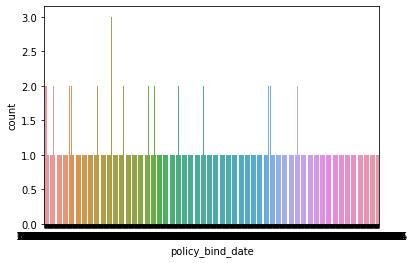

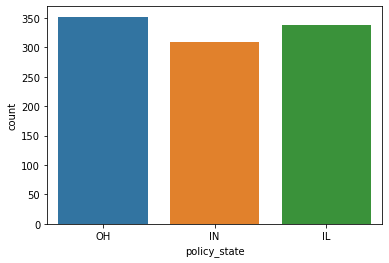

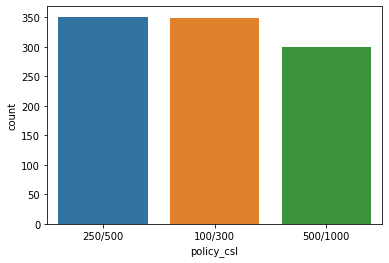

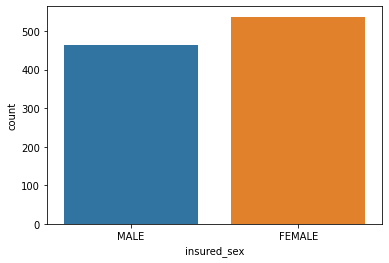

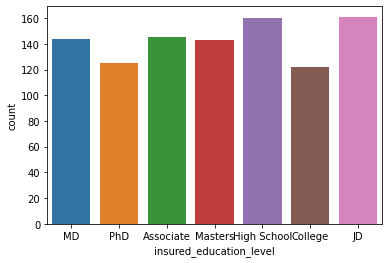

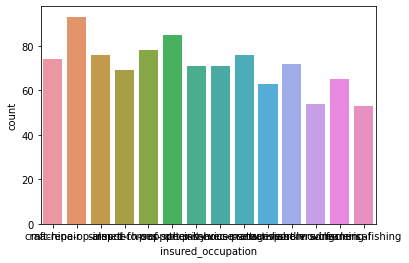

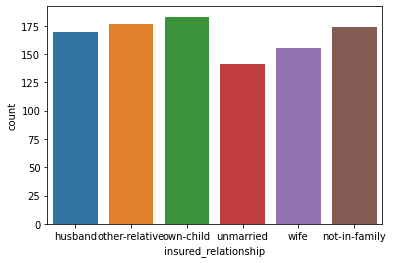

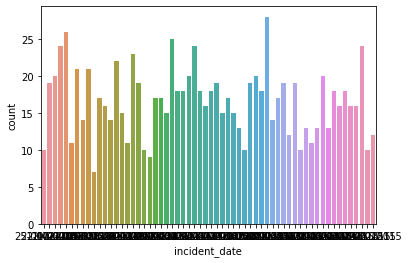

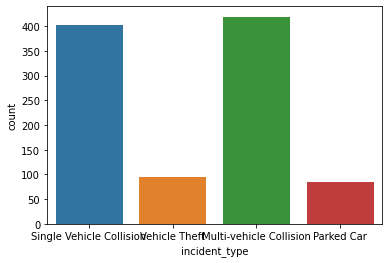

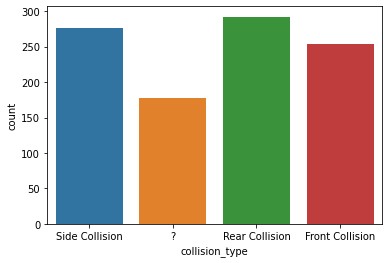

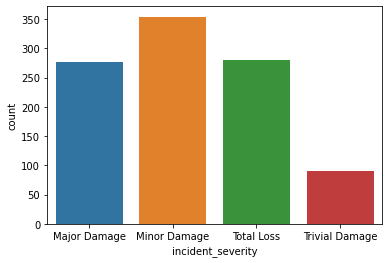

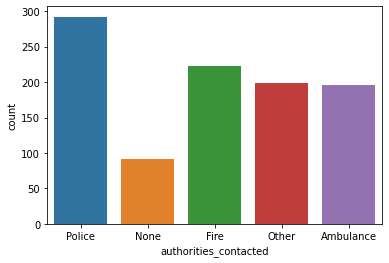

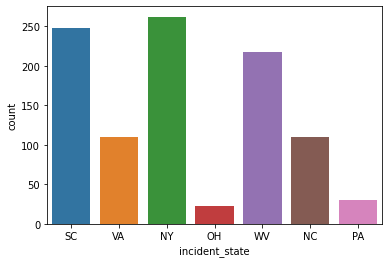

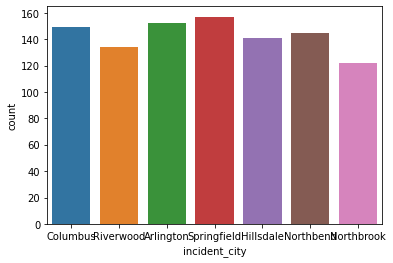

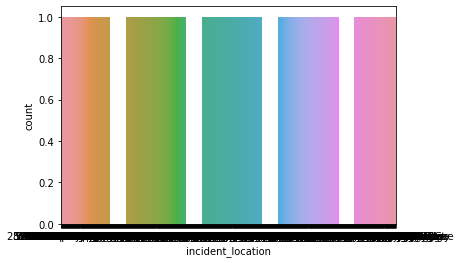

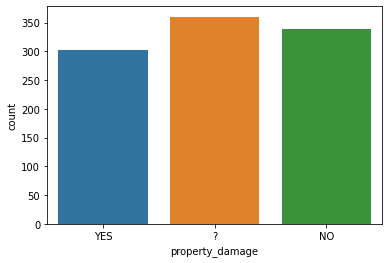

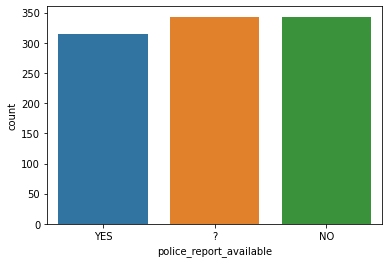

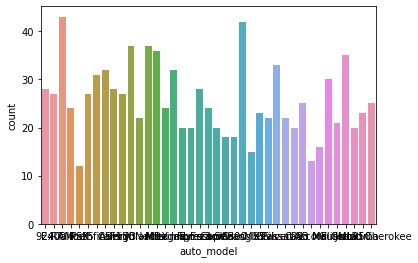

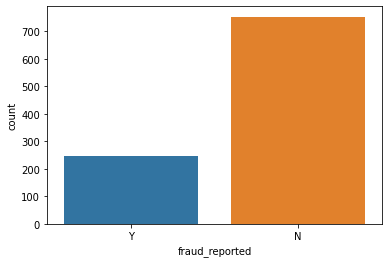

In [327]:
for i in categorical_data:
    sns.countplot(x=df[i])
  
    plt.show()

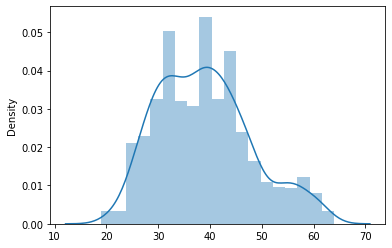

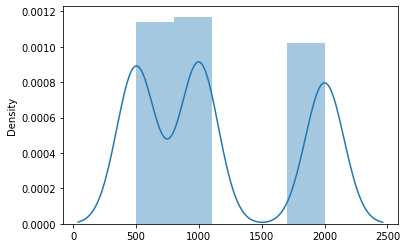

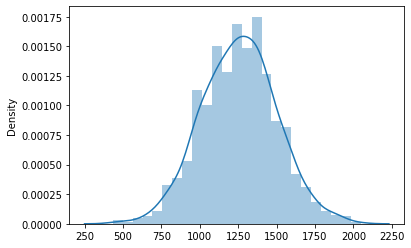

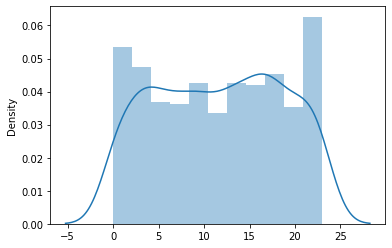

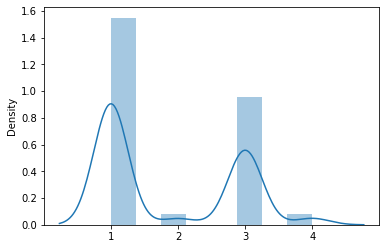

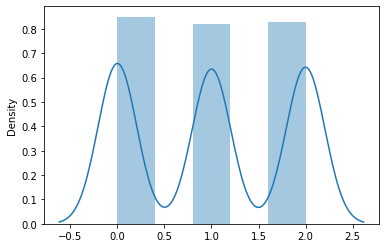

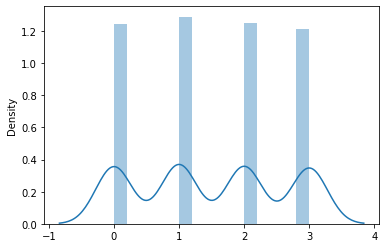

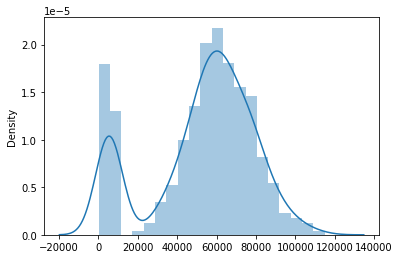

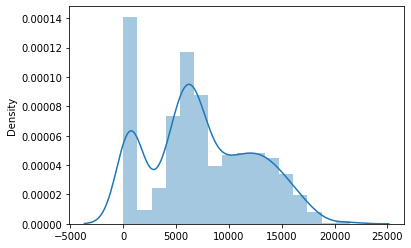

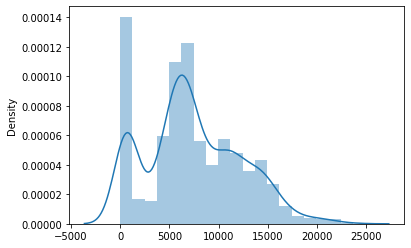

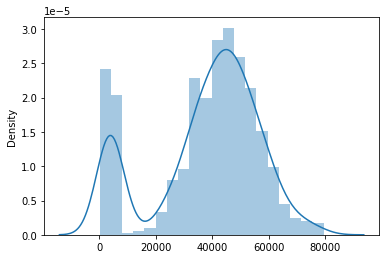

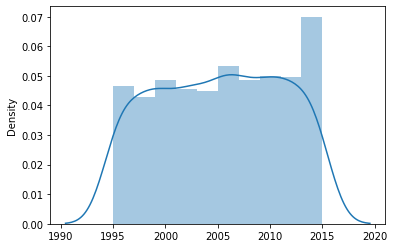

In [108]:
for i in numerical_columns:
    sns.distplot(x=df[i])
  
    plt.show()
#categorical columns are not normally distributed    

In [360]:
# we need tp convert all categorical values to numerical data
df["policy_month"]=df["policy_bind_date"].str.split("-").str[1].astype(int)
df["policy_year"]=df["policy_bind_date"].str.split("-").str[2].astype(int)

In [361]:

df=df.drop(columns="policy_bind_date")
df[["policy_month","policy_year"]]

,policy_month,policy_year
0,10,2014
1,6,2006
2,9,2000
3,5,1990
4,6,2014
...,...,...
995,7,1991
996,1,2014
997,2,2003
998,11,2011


In [362]:
df["incident_month"]=df["incident_date"].str.split("-").str[1].astype(int)
df["incident_year"]=df["incident_date"].str.split("-").str[2].astype(int)
df=df.drop(columns="incident_date")


In [363]:
df["incident_year"]

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: incident_year, Length: 1000, dtype: int64

In [364]:
df.corr()
#from this table it clearly says no possible for multicolinearity 

,age,policy_deductable,policy_annual_premium,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_month,policy_year,incident_month,incident_year
age,1.000000,0.029188,0.014404,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.008357,-0.037444,-0.037058,NaN
policy_deductable,0.029188,1.000000,-0.003245,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,-0.025020,-0.049598,-0.026416,NaN
policy_annual_premium,0.014404,-0.003245,1.000000,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.002480,0.001249,-0.046097,NaN
incident_hour_of_the_day,0.087161,0.060935,-0.001578,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.010163,0.035412,-0.003416,NaN
number_of_vehicles_involved,0.022102,0.051214,-0.045991,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,-0.026949,0.026595,0.052258,NaN
bodily_injuries,-0.015679,-0.022765,0.026780,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527,-0.025294,0.029987,0.002256,NaN
witnesses,0.052359,0.066639,0.002332,0.006527,-0.014669,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564,0.045791,0.018727,0.055907,0.012810,NaN
total_claim_amount,0.069863,0.022839,0.009094,0.217702,0.274278,0.047093,-0.011114,1.000000,0.805025,0.810686,0.982773,-0.035781,0.013929,-0.000146,-0.035781,NaN
injury_claim,0.075522,0.039107,-0.017633,0.165768,0.224650,0.047319,-0.024843,0.805025,1.000000,0.563866,0.722878,-0.013718,-0.008774,0.002529,-0.020664,NaN
property_claim,0.060898,0.064792,-0.011654,0.179536,0.219084,0.039749,0.052640,0.810686,0.563866,1.000000,0.732090,-0.014508,0.023367,-0.000970,-0.077109,NaN


In [365]:
df.skew()
#All values are less then 1 so no skewness is present

age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_month                  -0.016994
policy_year                    0.052511
incident_month                 0.267378
incident_year                  0.000000
dtype: float64

In [366]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df["insured_education_level"]=lbl.fit_transform(df["insured_education_level"])
df["fraud_reported"]=lbl.fit_transform(df["fraud_reported"])




In [367]:
df["fraud_reported"].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [368]:
categorical_data=[i for i in df.columns if df[i].dtype=="O"]
print("The number of categorical variables are {} ",len(categorical_data))
print("The categorical variables are {}",categorical_data)

The number of categorical variables are {}  15
The categorical variables are {} ['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_model']


In [369]:
dummies=pd.get_dummies(df[['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_model']],drop_first=True)

In [370]:
df=df.drop(columns=['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_model'],axis=1)


In [371]:
df=pd.concat([df,dummies],axis=1)

In [372]:
x=df.drop(columns="fraud_reported",axis=1)
y=df["fraud_reported"]

In [373]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [376]:
score=accuracy_score(y_test,y_pred)
score

0.755

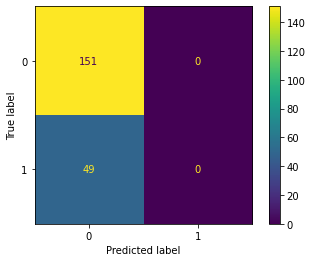

In [377]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [378]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [379]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [380]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [381]:
best_paramter=grid_search.best_params_
print(best_paramter)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [382]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.755

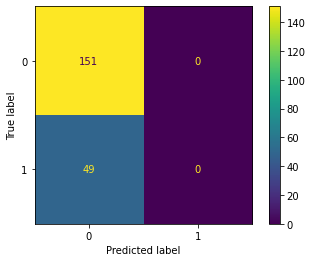

In [383]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [384]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [385]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

{'C': 0.001, 'gamma': 0.001}
0.7525000000000001


In [387]:
svc_model=SVC()
params = {'C':[0.001] , 'gamma': [0.001]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001], 'gamma': [0.001]}, scoring='accuracy')

In [388]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.755

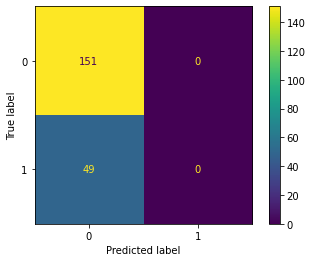

In [389]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [390]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [391]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [392]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)

RandomForestClassifier()

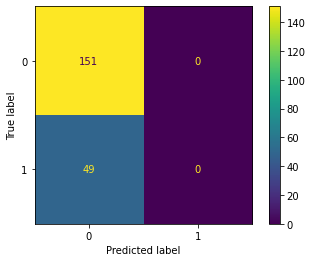

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [394]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [395]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.625

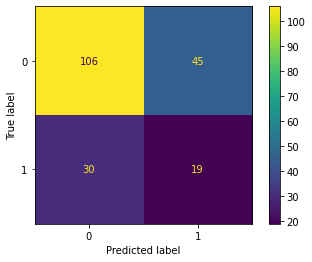

In [396]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [397]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       151
           1       0.30      0.39      0.34        49

    accuracy                           0.62       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.66      0.62      0.64       200



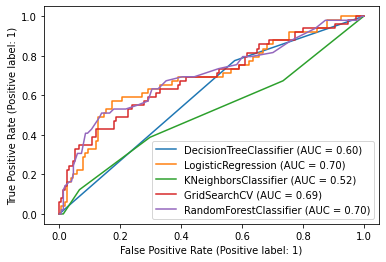

In [398]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

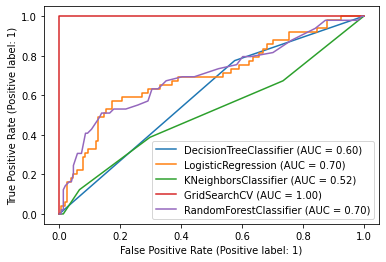

In [399]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [ ]:
#Both logistic regression and random forest classifer gives same accuracy. i go with logistic regression since cost of training is lower for logistic regression then Random forest regressor
import pickle
filename="Survive"
pickle.dump(lr,open(filename,"wb"))